In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import numpy as np

In [2]:
def __mkdir(*args):
    path = os.path.join(*args)
    try: 
        os.makedirs(path)
    except OSError:
        if not os.path.isdir(path):
            raise
    return path

In [3]:

# Set working directory as the current directory of the ipython notebook
working_dir = os.getcwd()
data_dir = __mkdir(working_dir, "data")

In [4]:
medex = pd.read_pickle(os.path.join(data_dir, 'medex.pckl')) 
medex = medex.rename(columns={'NctId': 'nct_id'})
medex.head(10)

,nct_id,criteria_id,drug_name,brand_name,drug_form,strength,dose,route,frequency,duration,neccessity,cui,rxnorm_cui,rxnorm_cui_generic,generic_name
0,NCT00001205,8,corticosteroid,,,,,,,,,,354,354,corticosteroid
1,NCT00001205,8,immunosuppressive,,,,,,,,,,5748,5748,immunosuppressive
2,NCT00001205,11,praziquantel,,,,,,,,,C0032911,8628,8628,praziquantel
3,NCT00001205,11,albendazole,,,,,,,,,C0001911,430,430,albendazole
4,NCT00001205,11,methotrexate,,,,,,,,,C0025677,6851,6851,methotrexate
5,NCT00001205,11,corticosteroid,,,,,,,,,,354,354,corticosteroid
6,NCT00001205,11,etanercept,,,,,,,,,C0717758,214555,214555,etanercept
7,NCT00001205,14,anthelmintic,,,,,,,,,,868,868,anthelmintic
8,NCT00001205,14,corticosteroid,,,,,,,,,,354,354,corticosteroid
9,NCT00001205,14,immunosuppressive,,,,,,,,,,5748,5748,immunosuppressive


In [31]:
def get_terms_to_docs(mm):
    data = []
#     index = []
    #for name, group in mm.groupby('cui'):
    for name, group in mm.groupby('drug_name'):
        g = group.drop_duplicates(subset='nct_id')
        nctids = list(set(g.nct_id.values))
        drug_name = g.drug_name.values[0]
        cui = list(set(g.cui.values))
        #stype = g.stype.values[0]
        d = {'cui': cui, 'drug_name': drug_name, 'nct_ids': nctids, 'num_docs': len(nctids)}
        data.append(d)
#         index.append(name)
#     df = pd.DataFrame(data, index=index).sort_values(by='num_docs', ascending=False)
    df = pd.DataFrame(data).sort(['num_docs'], ascending=False)
    return df

def get_docs_to_terms(mm, ctgov_data):
    data = []
#     index = []
    for name, group in mm.groupby('nct_id'):
        g = group.drop_duplicates(subset='cui')
        cuis = list(set(g.cui.values))
        drug_name = g.drug_name.values
        title = ctgov_data[ctgov_data['id_info.nct_id'] == name].brief_title.values[0]
        url = 'https://clinicaltrials.gov/ct2/show/' + name
        d = {'cuis': cuis, 'drug_name': drug_name, 'nct_id': name, 'num_terms': len(cuis), 'title': title, 'url': url}
        data.append(d)
#         index.append(name)
#     df = pd.DataFrame(data, index=index).sort_values(by='num_docs', ascending=False)
    #df = pd.DataFrame(data).sort_values(by='num_terms', ascending=False)
    df = pd.DataFrame(data).sort(['num_terms'], ascending=False)
    return df

In [32]:
ctgov = pd.read_pickle(os.path.join(data_dir, 'ctgov.pckl'))
docs_to_terms = get_docs_to_terms(medex, ctgov)
docs_to_terms.to_pickle(os.path.join(data_dir, 'medex-trials.pckl'))
docs_to_terms.head(100)

,cuis,drug_name,nct_id,num_terms,title,url
45,"[C0699931, , C0699606, C0085170, C0699601, C07...","[cimetidine, tagamet, vigabatrin, tiagabine, f...",NCT00057460,24,Effect of Talampanel (an AMPA Receptor Blocker...,https://clinicaltrials.gov/ct2/show/NCT00057460
862,"[, C0002600, C0070166, C0530684, C0003299, C00...","[antiepileptic, phenobarbital, phenytoin, prim...",NCT02535091,22,Safety and Pharmacokinetic Study of YKP3089 as...,https://clinicaltrials.gov/ct2/show/NCT02535091
227,"[, C0072980, C0025872, C0021747, C0008783, C00...","[isoniazid, rifampicin, ofloxacin, metronidazo...",NCT00425113,19,Metronidazole for Pulmonary Tuberculosis (Sout...,https://clinicaltrials.gov/ct2/show/NCT00425113
400,"[, C0006949, C2757014, C0048044, C0220839, C03...","[antiepileptic, sodium, zonisamide, lamotrigin...",NCT00931619,18,GABA/Glutamate Balance in Temporal Lobe Epilep...,https://clinicaltrials.gov/ct2/show/NCT00931619
233,"[C1701110, , C0024467, C1262867, C0001924, C08...","[gadolinium, vandetanib, zd6474, temozolomide,...",NCT00441142,14,Zactima With Temodar During Radiation Treatmen...,https://clinicaltrials.gov/ct2/show/NCT00441142
216,"[C0006949, C0377265, C0080356, C0060926, C0068...","[topiramate, tiagabine, pregabalin, phenytoin,...",NCT00394927,14,Adverse Event Scale in Patients With Epilepsy ...,https://clinicaltrials.gov/ct2/show/NCT00394927
755,"[, C0006949, C0042523, C0244656, C2936807, C02...","[antiepileptic, verapamil, stiripentol, felbat...",NCT02174094,13,Clobazam as Adjunctive Therapy in Paediatric P...,https://clinicaltrials.gov/ct2/show/NCT02174094
757,"[, C0006949, C0042523, C0244656, C2936807, C02...","[clobazam, verapamil, stiripentol, felbatol, l...",NCT02187809,13,Safety and Tolerability of Clobazam as Adjunct...,https://clinicaltrials.gov/ct2/show/NCT02187809
38,"[, C0072980, C0001924, C0987222, C0993472, C00...","[ace inhibitor, lisinopril, sirolimus, prednis...",NCT00050713,13,Sirolimus Therapy for Idiopathic and Lupus Mem...,https://clinicaltrials.gov/ct2/show/NCT00050713
618,"[, C0060135, C0035608, C0003299, C0033308, C03...","[lamotrigine, antiepileptic, over - the - coun...",NCT01713777,13,Equivalence Among Antiepileptic Drug Generic a...,https://clinicaltrials.gov/ct2/show/NCT01713777


In [33]:
terms_to_docs = get_terms_to_docs(medex)
terms_to_docs.to_pickle(os.path.join(data_dir, 'medex-terms.pckl'))
terms_to_docs.head(100)

,cui,drug_name,nct_ids,num_docs
63,[C0003299],antiepileptic,"[NCT00597285, NCT00152373, NCT00698581, NCT026...",194
103,[],benzodiazepine,"[NCT00866775, NCT00152373, NCT00849212, NCT020...",120
427,"[, C0376261]",lactate,"[NCT00416195, NCT00979004, NCT00956696, NCT001...",85
297,[C0060135],felbamate,"[NCT00416195, NCT00441896, NCT00866775, NCT001...",84
182,[],contraceptive,"[NCT00167245, NCT01335867, NCT00152503, NCT021...",74
410,[C1875327],investigational drug,"[NCT00790400, NCT00441896, NCT01648101, NCT021...",74
798,[C0048044],vigabatrin,"[NCT00441896, NCT00866775, NCT01335867, NCT001...",71
434,"[C1827202, C0377265, null]",levetiracetam,"[NCT02098941, NCT00855738, NCT02052739, NCT002...",61
135,[C0006949],carbamazepine,"[NCT00542802, NCT00866775, NCT00021866, NCT022...",59
593,"[C1123532, C0031507]",phenytoin,"[NCT00167245, NCT00021866, NCT00869622, NCT012...",56


In [34]:
trials = pd.read_pickle(os.path.join(data_dir, 'medex-trials.pckl'))
trials.head()

,cuis,drug_name,nct_id,num_terms,title,url
45,"[C0699931, , C0699606, C0085170, C0699601, C07...","[cimetidine, tagamet, vigabatrin, tiagabine, f...",NCT00057460,24,Effect of Talampanel (an AMPA Receptor Blocker...,https://clinicaltrials.gov/ct2/show/NCT00057460
862,"[, C0002600, C0070166, C0530684, C0003299, C00...","[antiepileptic, phenobarbital, phenytoin, prim...",NCT02535091,22,Safety and Pharmacokinetic Study of YKP3089 as...,https://clinicaltrials.gov/ct2/show/NCT02535091
227,"[, C0072980, C0025872, C0021747, C0008783, C00...","[isoniazid, rifampicin, ofloxacin, metronidazo...",NCT00425113,19,Metronidazole for Pulmonary Tuberculosis (Sout...,https://clinicaltrials.gov/ct2/show/NCT00425113
400,"[, C0006949, C2757014, C0048044, C0220839, C03...","[antiepileptic, sodium, zonisamide, lamotrigin...",NCT00931619,18,GABA/Glutamate Balance in Temporal Lobe Epilep...,https://clinicaltrials.gov/ct2/show/NCT00931619
233,"[C1701110, , C0024467, C1262867, C0001924, C08...","[gadolinium, vandetanib, zd6474, temozolomide,...",NCT00441142,14,Zactima With Temodar During Radiation Treatmen...,https://clinicaltrials.gov/ct2/show/NCT00441142


In [35]:
terms = pd.read_pickle(os.path.join(data_dir, 'medex-terms.pckl'))

top_terms = terms.sort('num_docs', ascending=False).head(100)
top_terms = top_terms.set_index('drug_name')
top_terms

,cui,nct_ids,num_docs
drug_name,,,
antiepileptic,[C0003299],"[NCT00597285, NCT00152373, NCT00698581, NCT026...",194
benzodiazepine,[],"[NCT00866775, NCT00152373, NCT00849212, NCT020...",120
lactate,"[, C0376261]","[NCT00416195, NCT00979004, NCT00956696, NCT001...",85
felbamate,[C0060135],"[NCT00416195, NCT00441896, NCT00866775, NCT001...",84
contraceptive,[],"[NCT00167245, NCT01335867, NCT00152503, NCT021...",74
investigational drug,[C1875327],"[NCT00790400, NCT00441896, NCT01648101, NCT021...",74
vigabatrin,[C0048044],"[NCT00441896, NCT00866775, NCT01335867, NCT001...",71
levetiracetam,"[C1827202, C0377265, null]","[NCT02098941, NCT00855738, NCT02052739, NCT002...",61
carbamazepine,[C0006949],"[NCT00542802, NCT00866775, NCT00021866, NCT022...",59


<class 'pandas.core.series.Series'>


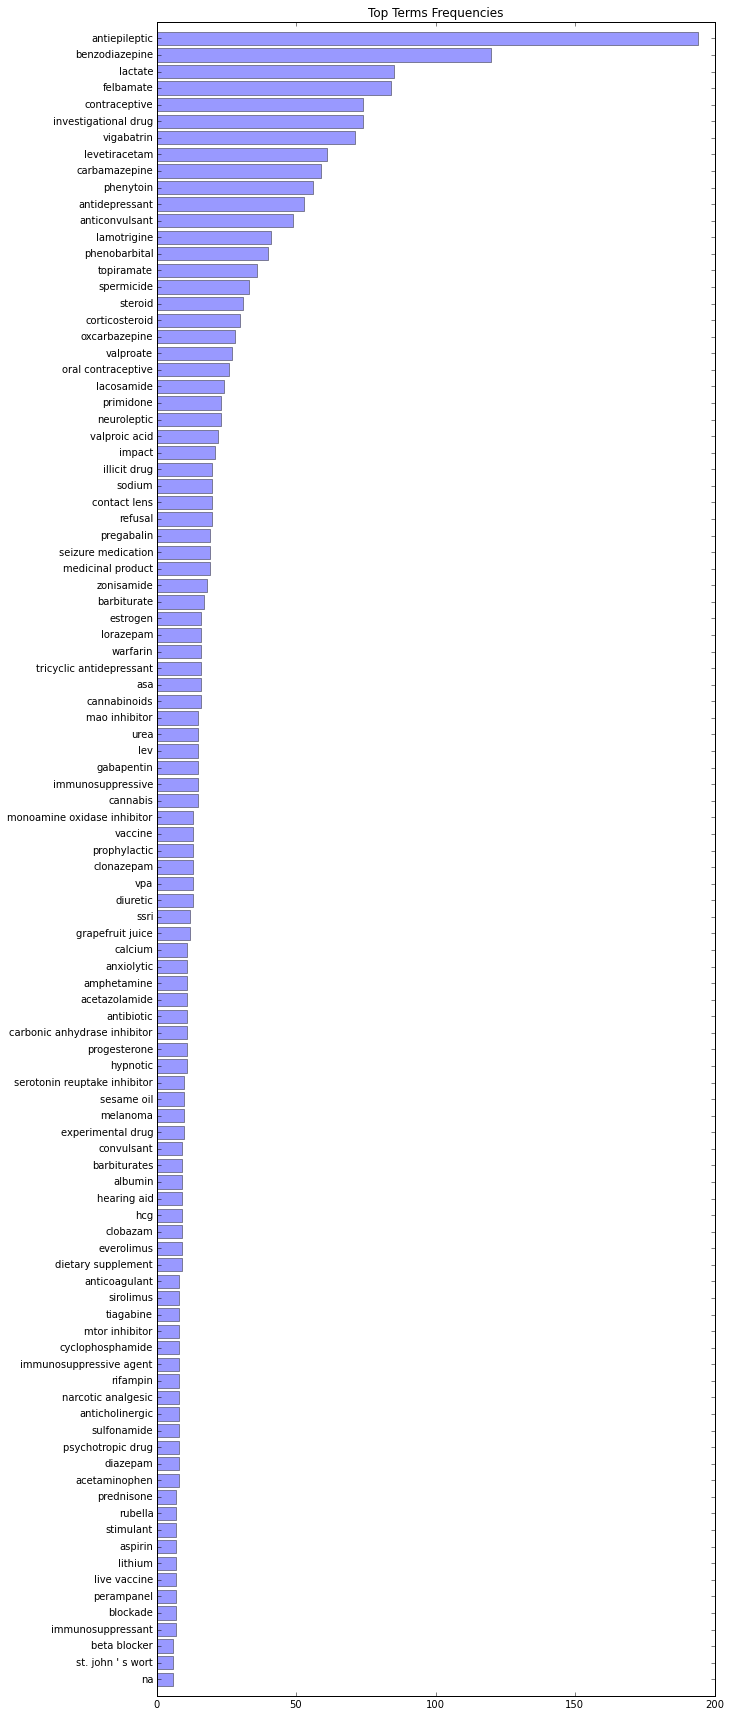

In [36]:

rcParams['figure.figsize'] = 10, 30 # control plot size
top_terms = terms.sort('num_docs', ascending=False).head(100)
print type(top_terms.num_docs)
#top_terms.sort_values(by='num_docs').num_docs.plot.barh(fontsize=12)
#top_terms.sort('num_docs').num_docs.plot.barh(fontsize=12)
y_pos = np.arange(100)[::-1]
plt.barh(y_pos, list(top_terms.num_docs), align='center', alpha=0.4)
plt.yticks(y_pos, list(top_terms.drug_name))
plt.ylim(-1, 100)
plt.title('Top Terms Frequencies')

# get_terms(N, k,m) and get_freqs realization

In [11]:
from operator import itemgetter

def get_freqs(terms, docs, perc=False):
    _docs = ('|'.join(doc) for doc in docs)
    cv = CountVectorizer(vocabulary=terms, analyzer=lambda doc: doc.split('|'))
    m = vect.transform(_docs)
    terms_freq = sorted([(term, round(float(freq)/len(docs), 2) if perc else freq) for term, freq in zip(terms, m.getnnz(0))], key=itemgetter(1), reverse=True)
    return terms_freq

def filter_terms(terms, curr_terms):
    _terms = list(set(terms) - set(curr_terms))
    return _terms

def filter_docs(docs, curr_terms, m):
    _docs = [doc for doc in docs if len(set(doc).intersection(set(curr_terms))) < m]
    return _docs

def get_terms(terms, docs, n=40, k=10, m=5):
    """
        (n, k, m) realization, which takes terms and docs and returns n terms with freqs
    """
    curr_terms_freq = []
    print len(docs), len(terms)
    while len(curr_terms_freq) < n:
        terms_freq = get_freqs(terms, docs, perc=False)
        curr_terms_freq += terms_freq[:k]
        curr_terms = [t[0] for t in curr_terms_freq]
        terms = filter_terms(terms, curr_terms)
        docs = filter_docs(docs, curr_terms, m)
        print len(docs), len(terms)
        print
    return curr_terms_freq[:n]
    

In [12]:
voc = terms.drug_name.values.tolist()
docs = [list(trial['drug_name']) for trial in trials[['drug_name']].to_dict('records')]

In [ ]:
trs = get_terms(voc, docs, n=40, k=5, m=2)
print trs